In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime
import pandas as pd
import numpy as np
from pylab import rcParams

In [69]:
#import and process the tmpsf data from nc files
tmpsf = 'sandbox/data/*.nc'
ds = xr.open_mfdataset(tmpsf, decode_times=True) #set to true to enable downsampling
df = ds.to_dataframe()
df = df.set_index('time')
df = df.resample('min').mean()
# df = df['2016-07-24':'2016-08-06'] # optionally you can subset the data by time

In [70]:
# convert time stamps back to ordinal for hexbin plotting
timestamp = []
timestamp_pd = list(pd.to_datetime(df.index.values))
for i in timestamp_pd:
    i = np.datetime64(i).astype(datetime.datetime)
    timestamp.append(dates.date2num(i))  

In [71]:
# plot individually
plt.close()
ds_variables = ds.data_vars.keys()
for j in ds_variables:
    if len(j) == 13 and j.startswith("t"):
        temp_value = []
        temp_value_pd = list((df[j].values))
        for k in temp_value_pd:
            temp_value.append(k)
    
        plt.close()
        fig, ax = plt.subplots()
        fig.set_size_inches(16, 6)
        hb1 = ax.hexbin(timestamp, temp_value, bins='log', vmin=0, vmax=2.5, gridsize=(100,300), cmap='magma')
        fig.colorbar(hb1)
        ax.yaxis.grid(True)
        ax.xaxis.grid(True)
        months = dates.MonthLocator()
        monthsFmt = dates.DateFormatter('%Y-%m')
        plt.xticks(rotation=70)
        ax.xaxis.set_major_locator(months)
        ax.xaxis.set_major_formatter(monthsFmt)
        plt.tight_layout()
        
        plt.show()
        break
#         out = "%s.png" % j
#         fig.savefig(out, bbox_inches='tight', transparent=True, pad_inches=0, orientation='portrait', format='png', dpi=300);

In [81]:
# plot together
plt.close()
fig, axes = plt.subplots(24, sharex=True)
fig.set_size_inches(11, 30)
c = 0
axes[0].set_title('Thermistor Temperatures')

ds_variables = ds.data_vars.keys()
for j in ds_variables:
    if len(j) == 13 and j.startswith("t"):
        temp_value = []
        temp_value_pd = list((df[j].values))
        for k in temp_value_pd:
            temp_value.append(k)
    
        plt.close()
        hb1 = axes[c].hexbin(timestamp, temp_value, bins='log', vmin=0, vmax=2.5, gridsize=(100,300), cmap='magma')
        ax.grid()
        months = dates.MonthLocator()
        monthsFmt = dates.DateFormatter('%Y-%m')
        plt.xticks(rotation=70)
        ax.xaxis.set_major_locator(months)
        ax.xaxis.set_major_formatter(monthsFmt)
        plt.tight_layout()
        c = c+1
        
        plt.show()
        break

# fig.savefig('all_temperatures.png', bbox_inches='tight', transparent=True, pad_inches=0, orientation='portrait', format='png', dpi=300);

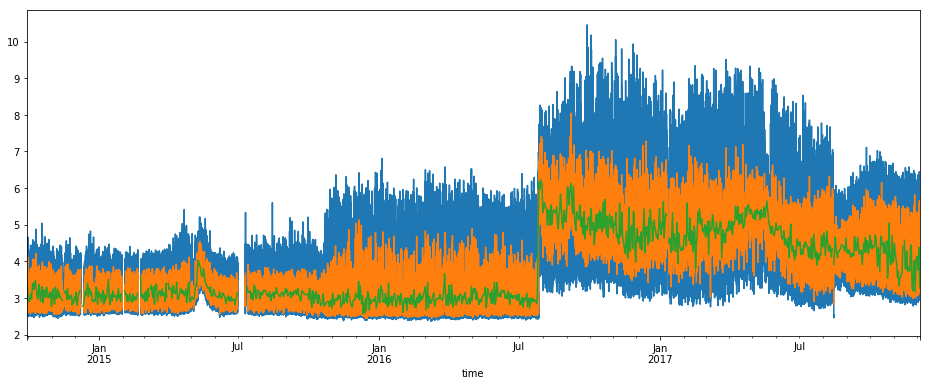

In [82]:
# some downsampled plots just for fun
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
df['temperature01'].plot(ax=ax)
df['temperature01'].resample('H').mean().plot(ax=ax)
df['temperature01'].resample('D').mean().plot(ax=ax)
plt.show()

In [4]:
#set to false to preserve ordinal timestamp for simple hexbin plotting
ds2 = xr.open_mfdataset(tmpsf, decode_times=False) 
df2 = ds2.to_dataframe()

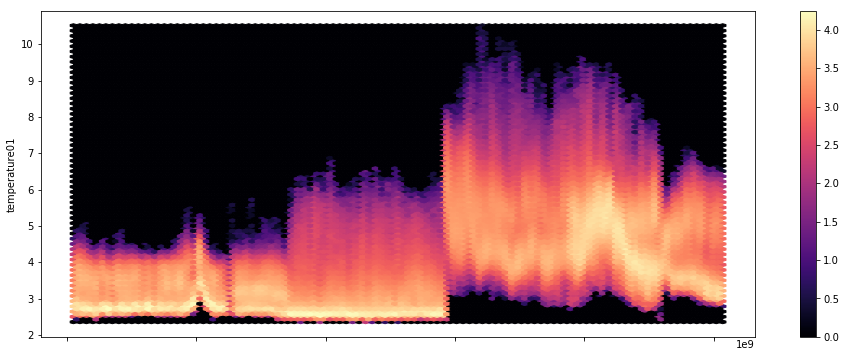

In [10]:
plt.close()
rcParams['figure.figsize'] = 16, 6
df2.plot.hexbin('time', 'temperature01', bins='log', cmap='magma') 
plt.show()

In [ ]:
# couldn't get dates to parse like this due to memory overflow error when matplotlib parses
# ordinal dates into months on the fly on full dataset, hence the downsampling and timestamp acrobatics up top...